# Notebook activity A2.3  Simulating random walks in R

In this notebook activity, you will learn how to simulate random walks in R. We start with simulating and plotting simple random walk models as introduced in Subsection 3.1 of Unit A2. Then, we simulate and draw random walk models with drift as discussed in Subsection 3.2 of Unit A2.

## (a) Getting started

Since we will be simulating our own series in this notebook activity, we will not need to load any data. Also we will not be using any functions that are only in the M348 package, so we do not need to load this package. However we will load a package required for time series analysis, `tseries`, into the session. 

### (i)

Load the `tseries` package by running the code cell below. (Note that when you do this you will get a warning message about a registered S3 method being overwritten. This is nothing to worry about.) 

In [ ]:
# Load the tseries package required for time series analysis
library(tseries)

## (b) Simulating simple random walks

Recall, from Subsection 3.1 of Unit A2, that the simplest model of a random walk, $Y_1, Y_2, Y_3, \ldots$, can be written as
\begin{equation*}Y_t = Y_{t-1} + \varepsilon_t.\end{equation*}

In what follows, you will write this model in terms of the sum of the past error terms and review the assumptions on them. You will then learn how to generate and plot simple random walks.

### (i)

In the Markdown cell below, show how the simple random walk model can be rewritten in terms of the sum of past error terms or random shocks.

(You may find it useful to review the contents of the webpage 'Including mathematical notation in Markdown', Subsection 2.2 of the 'Specific guidance for M348 assignments' on the 'Assessment' area of the M348 website.)

Double-click on the cell to enter your text.

#### Solution <a class="tocSkip">

The simple model of this random walk can be written as:

$\hspace{2cm} Y_t = Y_{t-1} + \varepsilon_t.$
			
Substituting backwards in time yields 

$\hspace{2cm} Y_t = (Y_{t-2} + \varepsilon_{t-1}) + \varepsilon_t$

$\hspace{2cm} Y_t = (Y_{t-3} + \varepsilon_{t-2}) + \varepsilon_{t-1} + \varepsilon_t$

$\hspace{2cm} \vdots$

$\hspace{2cm} Y_t = Y_0 + \varepsilon_{1} + \varepsilon_{2} + \varepsilon_{3} + \cdots + \varepsilon_{t-3} + \varepsilon_{t-2} + \varepsilon_{t-1} + \varepsilon_{t}$

$\hspace{2cm} Y_t = Y_0 + \sum_{i=1}^{t}{\varepsilon_i}.$

### (ii)

What assumptions are made about the error terms in your answer to part (i)?

#### Solution <a class="tocSkip">

It is assumed that the error terms $\varepsilon_s$ are distributed normally with zero mean, variance $\sigma^2$ and $\textrm{Cov}(\varepsilon_s,\varepsilon_{s-k}) = 0$, for all $k \neq 0$, and for all $s = 1, \cdots, t$.

---

###  <a class="tocSkip">

R provides us with the ability to generate pseudo random numbers drawn from a normal distribution. Therefore, we can generate a series of pseudo random errors that are normally distributed with mean = 0 and standard deviation = 10 over 50 time periods.

To do this in R in a way which is replicable, we first need to initialise the Random Number Generator. That is, to set a specific arbitrary value, a seed, for the procedure of the random number generation to start from. This way, we guarantee that R generates the same sequence of random numbers each time the code is run. This can be done by using the `set.seed()` R function. (If you want to try with a different sequence of random numbers, then give a different value for the seed.)

### (iii)

Set the seed of the random number generator by running the following code.

In [2]:
set.seed(15889) 

###  <a class="tocSkip">

To generate a sequence of 50 pseudo random numbers from the normal distribution with mean = 0 and standard deviation = 10, and save this sequence in an object called `epsilon`, we use the following R statement.
```
epsilon <- rnorm(50, mean = 0, sd = 10)
```
We can then generate a random walk as the sum of the previous error terms using `cumsum(epsilon)`. The cumulative sum function, `cumsum()`, creates a sequence of the same length as `epsilon`, where the $i$th element of the new sequence is the sum of the first $i$th elements of `epsilon`.

The statement 
```
randomWalk <- ts(cumsum(epsilon))
```
can be used to create a time series object from the cumulative sum sequence in `cumsum(epsilon)`. The resulting time series is saved in `randomWalk`. 

The resulting time series in `randomWalk` can be easily plotted using the command `plot(randomWalk)`.

### (iv)

To do all this, run the code cell below.

In [ ]:
# Generating a series, `epsilon`, of random errors
epsilon <- rnorm(50, mean = 0, sd = 10)

# Creating a random walk, `randomWalk`, as the cumulative sum of the 
# random errors, `epsilon`
randomWalk <- ts(cumsum(epsilon))

# Plotting the simulated random walk
plot(randomWalk)

###  <a class="tocSkip">

Figure 9 (Subsection 3.1, Unit A2) shows the plots of 30 simulated simple random walks. These were plotted against time with error terms that are normally distributed with mean = 0 and standard deviation = 10 over 50 time periods. You will now be able to produce a similar plot to that in Figure 9 (Subsection 3.1, Unit A2).

Notice that we set the seed of the Random Number Generator to the same number that was used to produce Figure 9. This way, we guarantee that R generates the same sequence of random numbers as the ones obtained for the plots in Figure 9.

To simulate, and plot, 30 different random walks, the process of simulating and plotting each single random walk will need to be repeated 30 times. Fortunately, there is a way to get R to automatically repeat a specific process using what is known as a `for` loop. This is where R repeats a block of commands *for* a set number of times. 

An example of the basic construction of a `for` loop is as follows. 
```
for (r in 1:30){
#  some R commands which may or may not include the parameter r
}
``` 
This tells R to run the commands first with $r = 1$, then with $r = 2$, and so on..., finishing with $r = 30$. 

Before we run the loop which creates the 30 plots, we first need to create an empty plot area. Then, we repeat 30 times the following steps:

- generate each value of the random error `epsilon`
- add it to the cumulative sum to obtain the random walk
- plot the random walk as a single line.

Notice that each time series in `randomWalk` starts at the time point 1 not 0. So, to add a starting value of 0 at the zero time point for each time series as in Figure 9 (Subsection 3.1, Unit A2), and also to plot each line in a pale gray colour we use the following command.
```
lines(c(0:50), c(0, RW), col = gray(0.5))
```

To repeat this process 30 times, the following code can be used.
```
for(r in 1:30) {
    
# Generating each series, `epsilon`, of random errors
    epsilon <- rnorm(50, mean = 0, sd = 10)

# Creating each random walk, `randomWalk`, as the cumulative sum of the random errors, `epsilon`
    randomWalk <- ts(cumsum(epsilon))

# Adding the line representing each random walk to the graph
    lines(c(0:50), c(0, RandomWalk), col = gray(0.5))
}
```

### (v)

Run the code cell below to obtain a plot of the same 30 simple random walks as in Figure 9 (Subsection 3.1, Unit A2).

In [ ]:
# Simulating simple random walks 

# Initialising the Random Number Generator
set.seed(15889) 

# Producing an empty plot with the required axes
plot(NULL, xlim = c(0, 50), ylim = c(-200, 200), xlab = "Time", ylab = "Value")

# Loop over the 30 random walks
for(r in 1:30) {
    
# Generating each series, `epsilon`, of random errors
    epsilon <- rnorm(50, mean = 0, sd = 10)

# Creating each random walk, `RW`, as the cumulative sum of the 
# random errors, `epsilon`
    randomWalk <- ts(cumsum(epsilon))

# Adding the line representing each random walk to the graph
    lines(c(0:50), c(0, randomWalk), col = gray(0.5))
}

### (vi)

Update the code in the cell below to repeat the simulation and obtain a new set of 30 random walks by varying the seed number. That is, the number within the brackets of the `set.seed()` function.

You may need to change the range of the y-axis on the graph in order to accommodate the plots for the newly generated random walks. This can be done by updating the numbers in the `ylim` option of the `plot()` function.

In [5]:
# Simulating simple random walks 

# Initialising the Random Number Generator
# set.seed(15889) 

# Producing an empty plot with the required axes
# plot(NULL, xlim = c(0, 50), ylim = c(-200, 200), 
#        xlab = "Time", ylab = "Value")

# Loop over the 30 random walks
# for(r in 1:30) {
    
# Generating each series, `epsilon`, of random errors
# epsilon <- rnorm(50, mean = 0, sd = 10)

# Creating each random walk, `randomWalk`, as the cumulative sum of the 
# random errors, `epsilon`
# randomWalk <- ts(cumsum(epsilon))

# Adding the line representing each random walk to the graph
# lines(c(0:50), c(0, randomWalk), col = gray(0.5))
# }

#### Solution <a class="tocSkip">

Although the exact trajectories of each individual random walk will, almost certainly, be different to those that you obtained in part (v), the general pattern should still be the same. The random walks will still move up and down, and some are likely to cross the zero line at least once. Also the scatter will have the same heteroskedastic pattern. 

## (c) Simulating random walk models with drift

Recall, from Subsection 3.2 of Unit A2, that a random walk can be augmented with a drift, often denoted as $d$, around which the random walk moves. 

In this case, a random walk, $Y_1, Y_2, Y_3, \ldots$, with a drift, $d$, can be written as
\begin{equation*}Y_t = Y_{t-1} + d + \varepsilon_t.\end{equation*}

In what follows, you will write this model in terms of the sum of the past error terms and then generate and plot random walks with drift.

### (i)

In the Markdown cell below, write the following random walk model with drift in terms of the sum of its error terms.

\begin{equation*}Y_t=Y_{t-1} + 22.5 + \varepsilon_t,\end{equation*}

where the error terms $\varepsilon_t$ are distributed normally with mean = $0$, standard deviation = $10$ and $\textrm{Cov}(\varepsilon_t, \varepsilon_{t-k}) = 0$, for all $k \neq 0$.

Double-click on the cell to enter your text.

#### Solution <a class="tocSkip">

The random walk model with drift can be written in terms of its error terms, using the backward substitution, as follows.

$\hspace{2cm} Y_t = Y_{t-1} + 22.5 + \varepsilon_t$

$\hspace{2cm} Y_t = (Y_{t-2} + 22.5 + \varepsilon_{t-1}) + 22.5 + \varepsilon_t = Y_{t-2} + 2 \times 22.5 + \varepsilon_{t-1} + \varepsilon_t$

$\hspace{2cm} Y_t = (Y_{t-3} + 22.5 + \varepsilon_{t-2}) + 2 \times 22.5 + \varepsilon_{t-1} + \varepsilon_t = Y_{t-3} + 3 \times 22.5 + \varepsilon_{t-2} + \varepsilon_{t-1} + \varepsilon_t$

$\mbox{}\hspace{2cm} \vdots$

$\mbox{}\hspace{2cm} Y_t = Y_0 + t \times 22.5  + \varepsilon_{1} + \varepsilon_{2} + \varepsilon_{3} + \cdots + \varepsilon_{t-3} + \varepsilon_{t-2} + \varepsilon_{t-1} + \varepsilon_{t}$

$\hspace{2cm} Y_t = Y_0 + 22.5  \, t + \sum_{i=1}^{t}{\varepsilon_i}.$

###  <a class="tocSkip">

Notice, from the solution to part (i), that the representation of the random walk with drift, in terms of the sum of error terms, differs from the corresponding representation of the simple random walk only by having the extra term $d \, t = 22.5 \, t$. Therefore, to simulate a random walk with the 22.5 drift in R, we need only to update the `cumsum` function to include the value of the drift. That is, we should use the command
```
randomWalkDrift <- ts(cumsum(22.5 + epsilon))
```
Recall, from the description of the `cumsum` function in part (b), that it gives a new sequence of values that represents the cumulative sum of its argument. In this case, the $i$th element of the sequence `cumsum(22.5 + epsilon)` will represent the cumulative sum of the first $i$th elements of `epsilon` plus the value of $22.5$ summed up $i$ times, i.e. $22.5 \times i$. This is exactly the extra term in the random walk with a drift of $22.5$.

You should now be able to update the code in part (b)(iv) to simulate a random walk with drift.

### (ii)

Using the empty code cell below, write code to simulate and plot 30 random walks with drift based on the model in part (i) over 37 time periods. To initialise the Random Number Generator, use the command `set.seed(348546)`. 

#### Solution <a class="tocSkip">

Running the code below produces the required plot of the random walks with drift (we have also added the average trajectory line to the plot in the last instruction). 

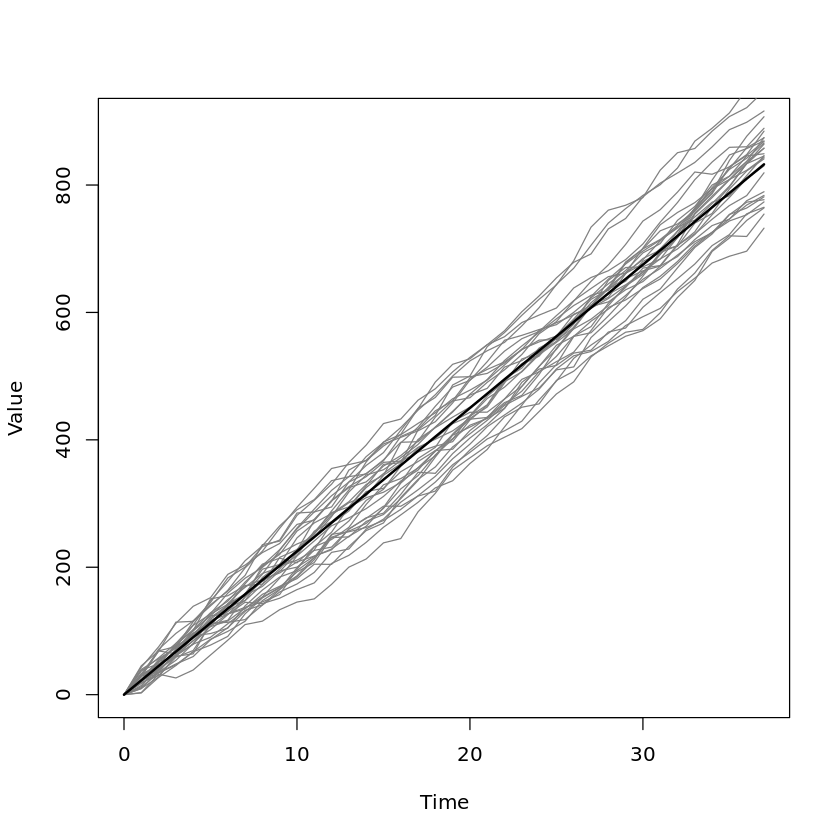

In [6]:
# Simulating random walks with drift

# Initialising the Random Number Generator
set.seed(348546)

# Producing an empty plot with the required axes
plot(NULL, xlim = c(0, 37), ylim = c(0, 900), xlab = "Time", ylab = "Value")

# Loop over the 30 random walks
for(r in 1:30) {
    
# Generating each series, `epsilon`, of random errors
epsilon <- rnorm(37, mean = 0, sd = 10) 
    
# Creating each random walk, `RWD`, as the cumulative sum of the 
# random errors, `epsilon`, and drift
randomWalkDrift <- ts(cumsum(22.5 + epsilon))

# Adding the line representing each random walk to the graph
lines(c(0:37), c(0, randomWalkDrift), col = gray(0.5))
}

# Adding the average trajectory line to the graph
lines(c(0:37), c(0:37*22.5), lwd = 2)

### (iii)

How does the plot you obtained in part (ii) compare to the plot in Figure 10 (Subsection 3.2, Unit A2)?

#### Solution <a class="tocSkip">

Since you set the seed of the Random Number Generator to the same number that was used to produce the plot in Figure 10, the two plots look similar to each other.

The last line in the code below plots the thick black line in the middle of random walks. This line represents the average linear trajectory which simply assumes that $Y_t = Y_0 + 22.5 \, t$.

## (d) Finishing off 

In this notebook activity, you learnt how to simulate and plot two different random walk models in R. These are the simple random walk model and the random walk model with drift.